In [1]:
import sys
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from PIL import Image
# from pandas_profiling import ProfileReport
from functools import reduce
import statsmodels.api as sm 

%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False



from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score

## 기업의 사회적 책임과 그 기업의 신용도의 관계 대한 고찰

美 유나이티드 항공, 주가 폭락에 화들짝 “승객 끌어내 죄송” 한국일보 2017.04.12 

"인종차별 논란이 일면서 각종 사회관계망서비스(SNS)에서는 항공사 보이콧 운동이 격화"

"이에 투자자들이 반응으로 이날 뉴욕증시에서 유나이티드항공 모회사인 유나이티드 컨티넨탈 홀딩스의 주가는 전일 대비 1.13% 하락으로 마감"

"한때 주가가 4%까지 급락했으며 유나이티드항공의 시총 약 2억5,500만달러(2,900억원)가 하루 사이 공중으로 날아갔다."

기업의 사회적 책임을 다하지 못함이 투자자들의 부정적 반응을 이끌어냄


### 기업이란


영리기업과 비영리단체의 경계가 허물어진다 밴처스퀘어 2012년 3월 2일

"영리와 비즈니스를 중심에 두는 기업과 비영리 단체는 전통적으로 그 경계가 명확했고, 이들의 역할을 벗어나면 안되는 것으로 생각했던 것이 지금까지의 통념이다.

그러나, 최근 기업과 비영리단체들이 서로 상호작용하고 서로에게 많은 것을 배우는 현상이 많아지고 있다."

기업은 크게 이윤 극대화가 목적인 영리기업과 사회적 가치 실현에 중점을 두는 비영리 기업으로 나뉨

그러나 시간이 지나면서 두 기업의 경계가 모호해지기 시작함

그 이유가 무엇일까?

In [2]:
im1 = Image.open('1.png')
im1.resize((600,300))

FileNotFoundError: [Errno 2] No such file or directory: '1.png'

### 기업의 지속가능한 성장

"Investors are increasingly convinced that integration of ESG into their investment process maximizes\
their long-term interest and that good corporate governance and sustainability\
will contribute to the creation of long-term value for shareholders."

<u>(Benlemlih, M. 2019)</u>
 
For the measurement of economic performance in relation to the ESG indicators are proposed the Key Performance Indicators (KPIs). 
The economic performance indicators provide quantitative forms of a feedback which reflect the results in the framework of their corporate strategy. The approach is not differed when managing environmental, social and governance issues.
    
기업의 적절한 사회적 책임 이행은 기업의 장기적이고 지속적인 성장과 관련있다 즉 사회적 책임 이행 유무가 기업의 지속가능한 성장의 기회와 동시에 리스크로 작용할 수 있다


경영에 있어 이러한 장기적 목표를 위한 의사결정을 내릴 때 그 기업이 처한 상황과 핵심역량에 따라 결정이 되는데 이때 사용되는 재무지표가 Key Performance Indicators (KPIs) 이다. KPI에는 기업 활동 과정에 있어 나오는 수익률을 보는 지표이다 이 지표는 신용평가 기관에서 보는 지표와 비슷하다

In [ ]:
im1 = Image.open('2_kpi.png')
im1.resize((600,300))

### 사회적 책임 세분화 기준

기업의 사회적 책임을 나누는 기주는 크게 3가지이다


#### E-환경, S-사회, G-지배구조

환경은 말그대로 환경 유지에 기업이 어떤 역활을 하는가이다

사회란 기업이 속한 지역사회의 가치를 실현 등의 외부적 요소와 내부 구성원들의 환경 및 처우 등이 관련된 내부 요소로 나뉘며 그 경계가 모호하다. 

지배구조란 기업의 내부 시스템의 퍼포먼스로 기업윤리 및 주주들의 이윤 극대화에 얼마나 충실한지와 내부 구성원에 의해 생길 리스크 관리가 포함된다.

corporate governance,Codes of business conduct, Risk and crisis management

### 사회적 책임과 회사의 의사결정 관계

"기업의 사회적 책임이 항상 일정하게 추진되는 것이 아니라 외부 충격(예:경제위기)이나 정치적 불안정(예:정권퇴진) 등의 시 기에 급격하게 후퇴하는 것으로 나타났다"

<u>(한국 대기업의 사회적 책임에 관한 연구_정흥준 외)</u>

미래가치의 투자는 현시점 기업의 상황과 핵심역량에 따라 갈리는데 현시점의 재무상태가 좋지 못하거나 기업의 역량이 미래의 시점에서 미약할 경우

미래에 대한 투자가 어렵다는걸 말한다 



### ESG에 관한 연구 해외

'Our findings suggest that ESG performance, especially concerning social and governance metrics, 
meaningfully affects credit ratings.'

<u>(Devalle, Alain & Fiandrino, Simona & Cantino Valter, 2017, Conclusion.)</u>
 
Logistics regression 모델 사용 
  (환경)Env_Innov_Sc - 0.021, (사회)Community_Sc - 0.001 
  (지배구조)Product_Resp_Sc - 0.037 (지배구조)Shareholder_Sc - 0.001

"These six provisions are called the “E-Index” (E for entrenchment), and while they (Bebchuk, Cohen, and Wang, 2012)\ 
found that both the G-Index and E-Index would have resulted in abnormal returns in the 1990s"

<u>(Exploring the G in ESG, S&P DOW JONES INDICES, 22 Mar, 2012)</u>
    
we find that firms benefit more when they adopt a CSR engagement strategy that is consistent, 
involves related dimensions of CSR, and begins with aspects of CSR that are more internal to the firm. 

<u>(Zhi Tang, Clyde Eiríkur Hull, Sandra Rothenberg, 5 June 2012 ) </u>


### 한국에서의 ESG


국내 신용평가사는 ESG 일부 요소가 이미 신용등급에 반영돼 있다는 입장이다. 
실제로 지배구조(G)가 취약한 기업의 경우 신용등급 산정 시 해당 요소가 부정적으로 작용한다.

'08~14년까지의 데이터를 보아 E는 음의 관계, S는 관계성이 낮고, G는 양의 관계를 가짐'

<u>(Han et al. Asian Journal of Sustainability and Social Responsibility, 2016)</u>

'esg 데이터는 소형 회사의 경우 충분한 데이터를 모을 수 없어  신뢰 할 수 있는 esg를 구하기 어려움 그래서 규모가 큰 회사를 대상으로 진행하거나 Esg를 따로 분리하여 독립적으로 볼 것, G의 중요성을 시사, ESG는 신용등급과 negative한 관계를 가짐'


'연구 결과로는 ESG가 신용평가에 영향을 미치며 기업의 규모에 따라 조금 다르게 영향을 미칠 수 있음, 전반적으로 E의 영향이 우세하며 작은 기업일수록 E의 영향을 많이 받음'

<u>(ESG Scores and the Credit Market, 25 March 2020)</u>



### 예측 
많은 연구들에서 보듯 ESG가 신용등급에 반영에 영향력이 있음을 보이는 연구들을 쉽게 찾을 수 있었다

재무상태가 좋지 못한 기업 즉 신용도가 낮은 기업은 기업의 사회적 책임을 다하는 의사결정을 내리기 어려울 것이며 

이에 ESG점수가 낮게 나올 것이다 이러한 판단을 하는데 있어 보는지표 KPI는 신용평가사에서 보는 

재무지표과 많은 연관이 있음으로 

결과적으로 재무상태가 좋지 못한 기업은 ESG 스코어가 낮게 내올 것이며 신용평가 역시 낮게 나올 것이다

즉 ESG를 사용하면 신용평가 등급을 예측하는데 더 도움이 될 것

#### 독립변수 2013년 부터 2020년까지의 데이터를 사용 

#### 재무지표

기업의 신용을 결정 할 때는 그 기업의 자산에 부채가 얼만큼 차지하는지 그 부채를 상환 할 수 있는 능력이 어떻게 되는지를 고려
    
- INTCOV : 세후 순 영업이익
- ROA	: 자산대비 수익률
- ROE	: 자본대비 수익률
- EQTA : 자기자본비율
- CURR :당기 자산과 부채의 비율
- EBITDA : 당기 순이익에서 금융비용,및 세금과 유무형 자산 감가상각을 하기 전
- NI : 순이익	
- TASSET : 총자산
- Sale : 매출	
- DR : 부채비율	
- BTEBITDA : 차입금 대비 이자,세금 차감전 당기 순이익 비율
- EBITDATIE : 당기순이익 분에 이자 비용 비율
- TB : 총 부채	
- LTDTA :	총자산분의 비유동부채 비율
- FCF	:잉여 현금흐름
- EBITTS : 매출의 당기순이익 비율

<u> (나이스 기업신용평가 주요 재무제표 .2020)
    
   ( The use of different approaches for credit rating prediction and their comparison : Martina Novotná September 2012) </u>

       
#### ESG지표 


- E,S,G,ESG의 각 점수 <u>( KCGS : 한국기업지배구조원)</u>

- 신용평가 등급(종속변수) 

- 13년부터 20년까지, D등급 부터 AAA구간을 백분율화하여 분포에 맞게 5등급으로 나누고 점수를 배점 

     <u> (머신러닝 기법을 활용한 기업 신용위험 시계열 예측 모델 개발 연구 : 이현상 and 오세환)</u>




## Credit Rating

In [3]:
df_credit_2020 = pd.read_excel("2020_credit_rating.xlsx")
df_credit_2020.head()

,Unnamed: 0,평가회사,평가대상회사,평가대상종류,공시일자,평가등급,등급감시,등급전망
0,1,한국기업평가,삼성엔지니어링(주),본평가,2020-01-02,A-,NaN,안정적
1,2,한국기업평가,삼화페인트공업(주),수시평가,2020-01-02,BBB+,NaN,안정적
2,3,나이스신용평가,예금보험공사,본평가,2020-01-08,AAA,NaN,안정적
3,4,한국기업평가,에스케이증권(주),본평가,2020-01-09,A,NaN,안정적
4,5,한국기업평가,우리종합금융(주),본평가 (정정),2020-01-09,A,NaN,안정적


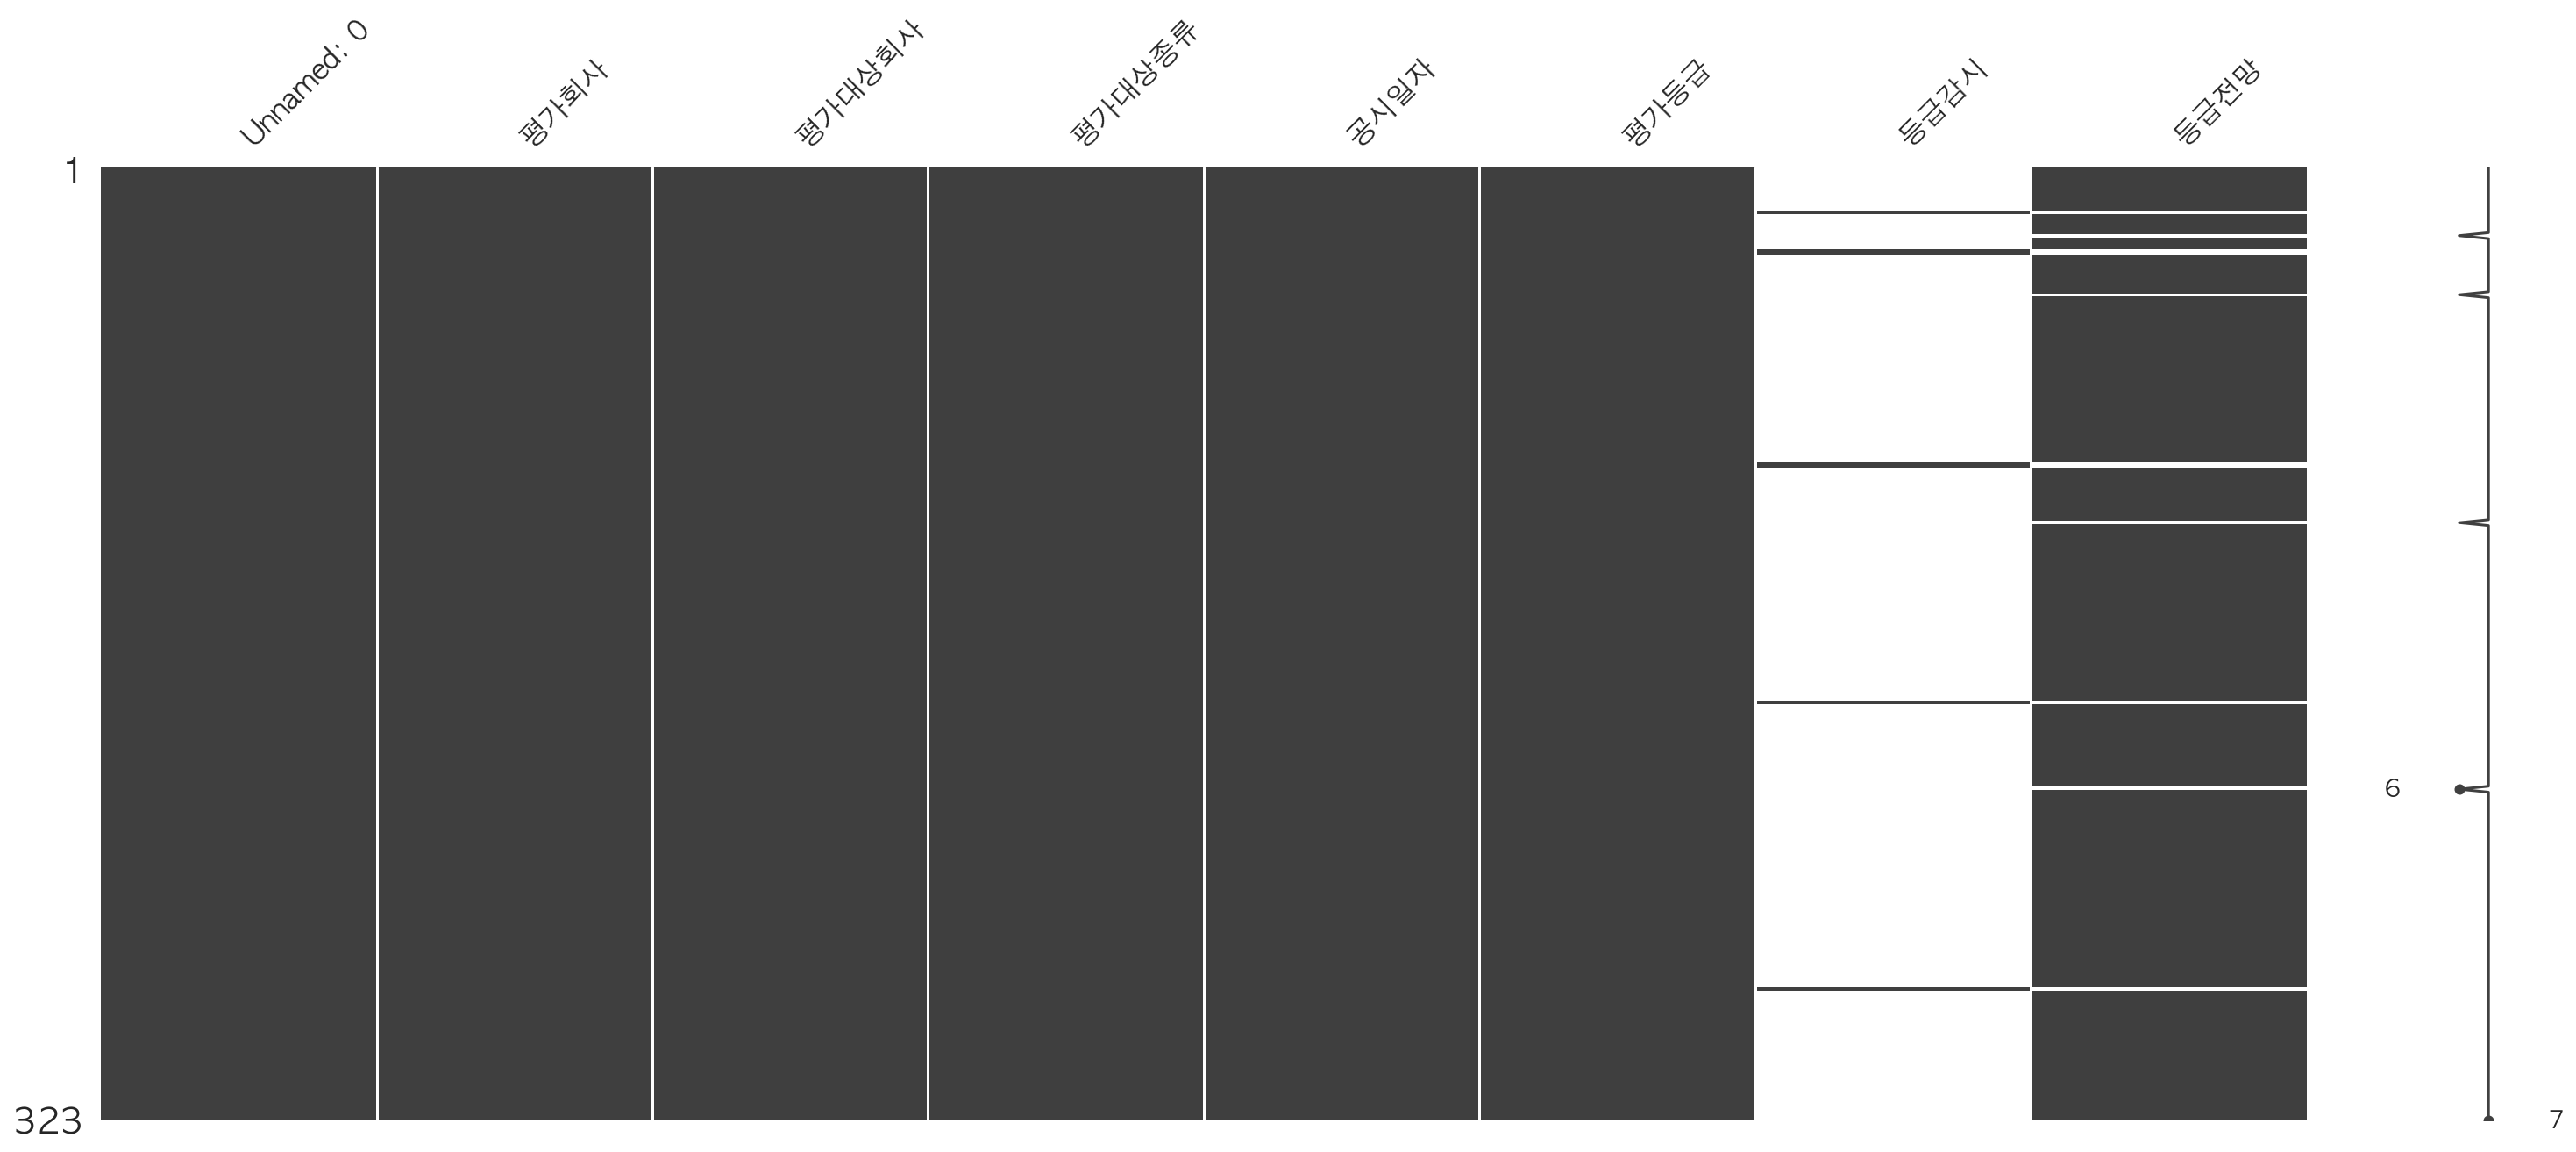

In [4]:
msno.matrix(df_credit_2020)
plt.show()

In [5]:
def screen_name(df):
    df = df.rename(columns = {"평가대상회사":"기업명"})
    df = df[["기업명","공시일자","평가등급"]]
    df["공시일자"] = df["공시일자"].apply(lambda x: int(str(x)[:4]))
    df["평가등급"][df["평가등급"] == "취소"] = np.nan
    df["기업명"] = df["기업명"].apply(lambda x: str(x).replace("(주)",""))
    df = df.dropna()
    df = df.drop_duplicates(['기업명'],keep="last").reset_index(drop=True)
    return df


def change_columns(df):
    columns = ["종목코드","기업명","결산월","단위","2019","2018","2017","2016","2015","2014"
               ,"2013","2012","2011","2010","2009","2008"]
    df.columns = columns
    df = df.rename(columns = {"종목코드":"기업코드"})
    return df


def merge_code(dfa,dfb):
    dfb = dfb[["기업코드","기업명"]][dfb["기업명"].isin(dfa["기업명"])]
    dfa = pd.merge(dfa,dfb, on="기업명",how="inner")
    return dfa


def name_change(df3):            
    return df3.rename(columns={'자산총계':"TA",'이자보상배율':'INTCOV','ROA':'ROA','ROE':'ROE',
                            '총자산_총자본':'EQTA','유동비율':'CURR','비유동부채_자산':'LTDTA',
                              '사회':'S','환경':'E','지배구조':'G', "당기순이익":'NI','자산총계':'TASSET',
                              '매출액':'Sale','부채비율':'DR','차입부채_EBITDA':'BTEBITDA','EBITDA_이자비용':'EBITDATIE',
                              '총차입부채':'TB','EBIT_매출액':'EBITTS'})

mod = sys.modules[__name__]

In [6]:
df_credit_2017 = screen_name(pd.read_excel("2017_credit_rating.xlsx"))
df_credit_2018 = screen_name(pd.read_excel("2018_credit_rating.xlsx"))
df_credit_2019 = screen_name(pd.read_excel("2019_credit_rating.xlsx"))
df_credit_2020 = screen_name(pd.read_excel("2020_credit_rating.xlsx"))
df_2013_2016_credit = pd.read_excel("2013-2016_credit_rating.xlsx")
df_2013_2016_credit.columns = ["nnamed", "평가회사","기업명","평가","평가대상종류","공시일자","평가등급","등급감시","등급전망"]
df_2013_2016_credit["공시일자"] = df_2013_2016_credit["공시일자"].apply(lambda x: int(str(x)[:4]))

df_credit_2013 = screen_name(df_2013_2016_credit[df_2013_2016_credit["공시일자"] == 2013])
df_credit_2014 = screen_name(df_2013_2016_credit[df_2013_2016_credit["공시일자"] == 2014])
df_credit_2015 = screen_name(df_2013_2016_credit[df_2013_2016_credit["공시일자"] == 2015])
df_credit_2016 = screen_name(df_2013_2016_credit[df_2013_2016_credit["공시일자"] == 2016])

df_credit_2013.head()

,기업명,공시일자,평가등급
0,동국제강,2013,A
1,하나은행,2013,AAA
2,이수화학,2013,BBB
3,경남개발공사,2013,AA+
4,현대하이스코,2013,AA-


## ESG

In [7]:
df_esg = pd.read_csv("2011-2019-ESG.tsv", sep='\t')
df_esg.head()

,NO,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도,비고
0,6567,AJ네트웍스,95570,B,B,B,C이하,2019,NaN
1,6566,AJ렌터카,68400,C이하,C,B,B,2019,NaN
2,6565,AK홀딩스,6840,B,B,B,C이하,2019,NaN
3,6564,AP시스템,265520,C이하,B,C이하,C이하,2019,NaN
4,6563,BGF,27410,B,B,A,C이하,2019,NaN


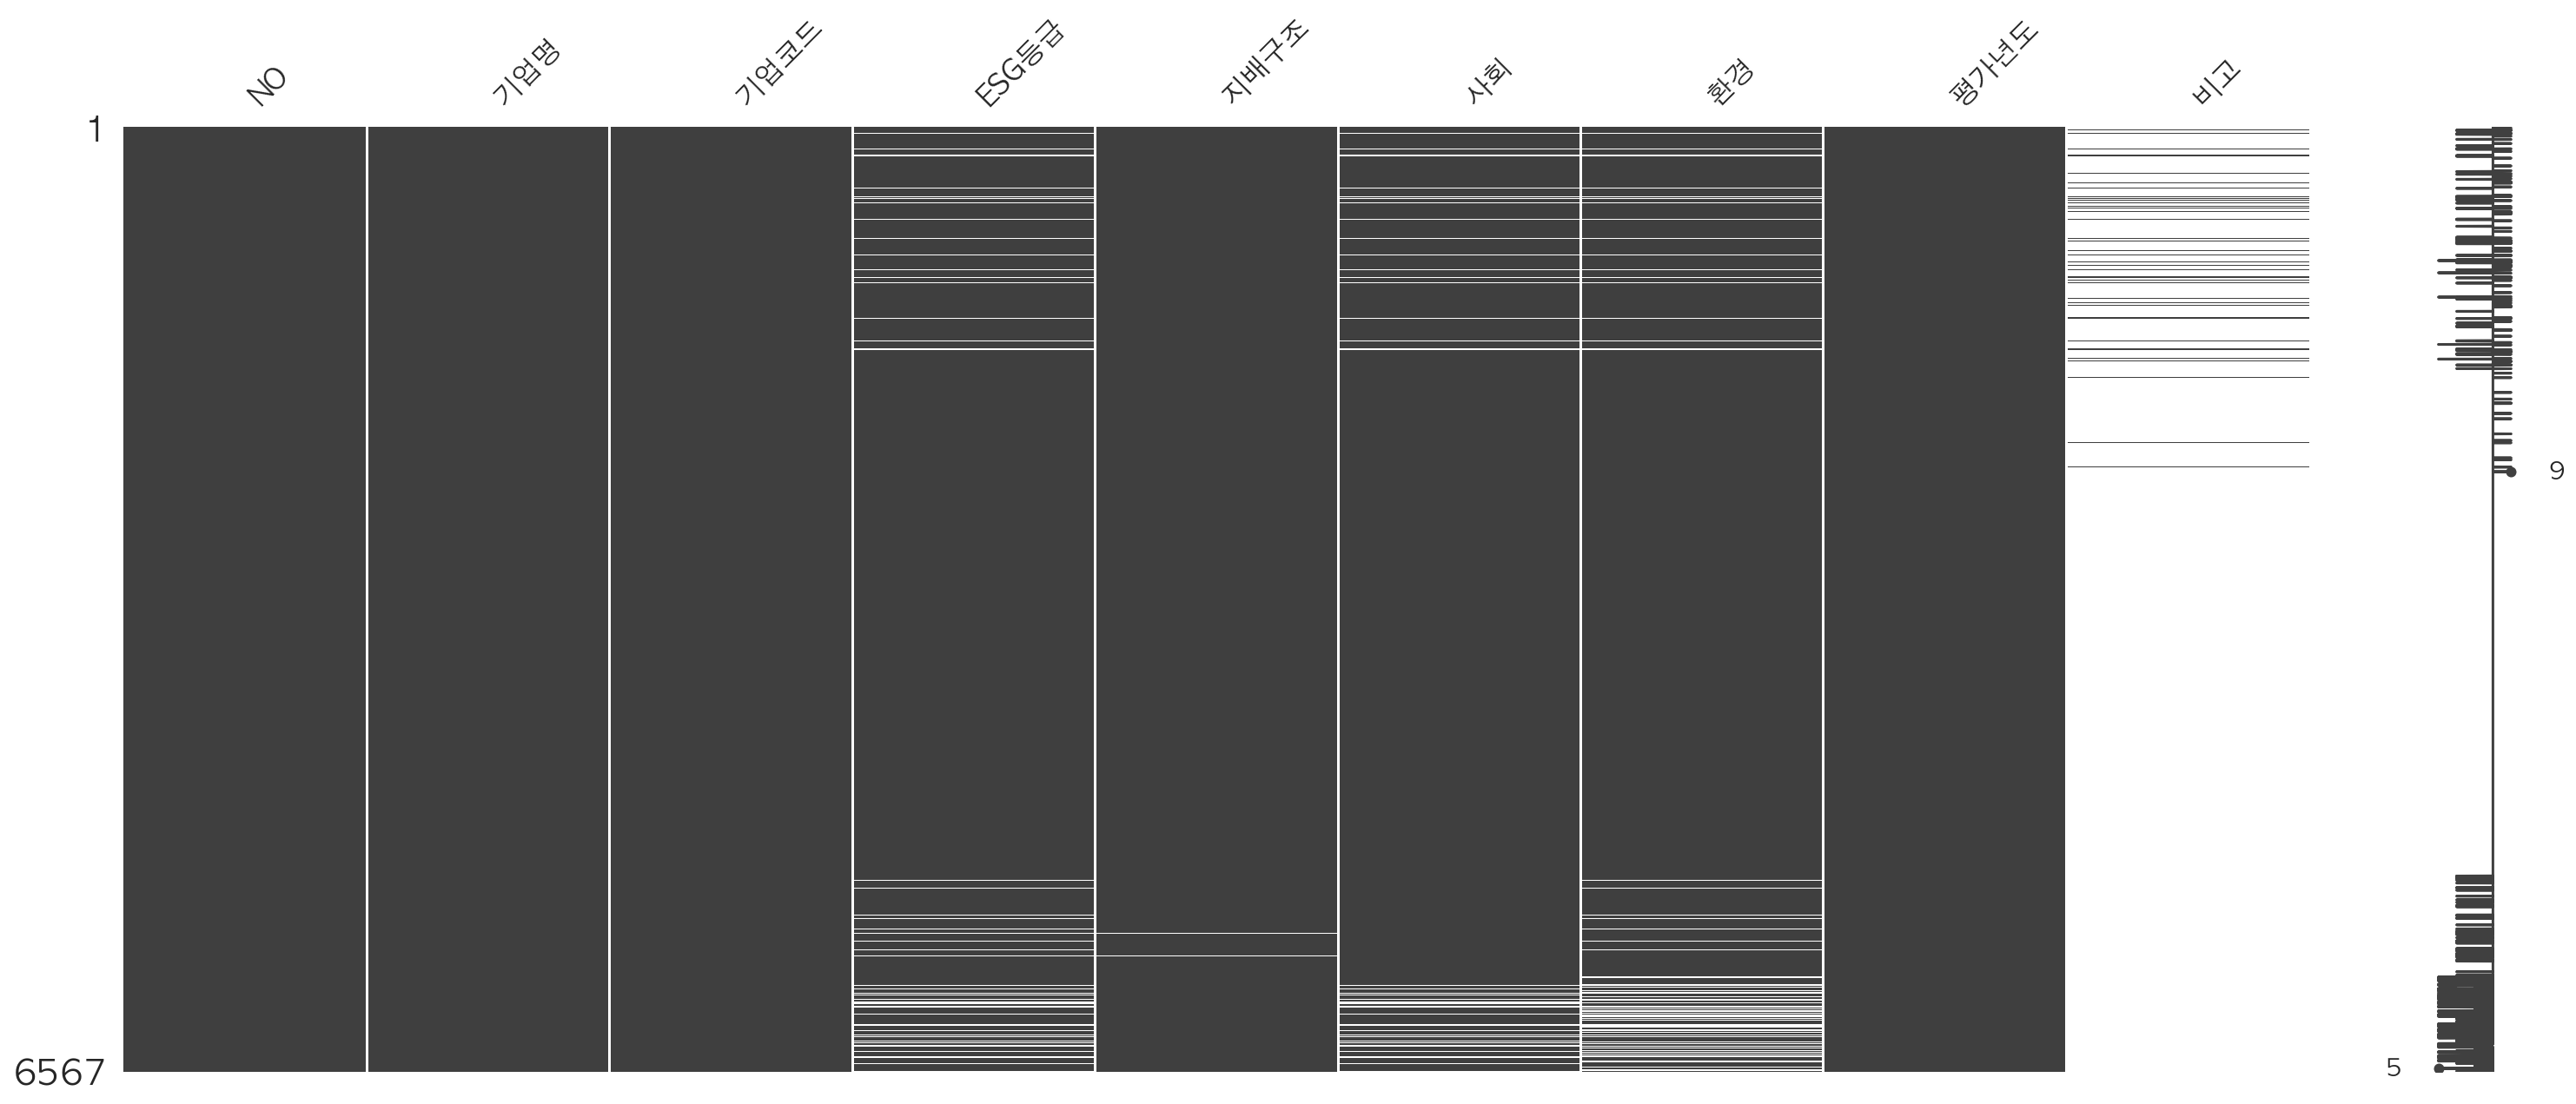

In [8]:
msno.matrix(df_esg)
plt.show()

In [9]:
df_esg = df_esg.drop(columns = ['NO', '비고']).dropna()
df_esg.기업코드 = df_esg.기업코드.apply(lambda x: str(x).zfill(6))

di = {"S":70.0,"A+":60.0,"A":50.0,"B+":40.0,"B":30.0,"B이하":30.0,"C":20.0,"C이하":20.0,"D":10.0}

df_esg.ESG등급 = list(map(di.get, df_esg.ESG등급))
df_esg.환경 = list(map(di.get, df_esg.환경))
df_esg.사회= list(map(di.get, df_esg.사회))
df_esg.지배구조= list(map(di.get, df_esg.지배구조))

mod = sys.modules[__name__]

for i in range(2011,2020):
    setattr(mod, 'df_esg_{}'.format(i),df_esg[df_esg["평가년도"]==i])
    
df_esg_2011.head()

,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도
5904,AK홀딩스,006840,30.0,30.0,30.0,30.0,2011
5905,BYC,001460,30.0,30.0,30.0,30.0,2011
5908,CJ대한통운,000120,40.0,30.0,40.0,30.0,2011
5910,CJ제일제당,097950,40.0,40.0,40.0,50.0,2011
5914,DB손해보험,005830,50.0,50.0,50.0,40.0,2011


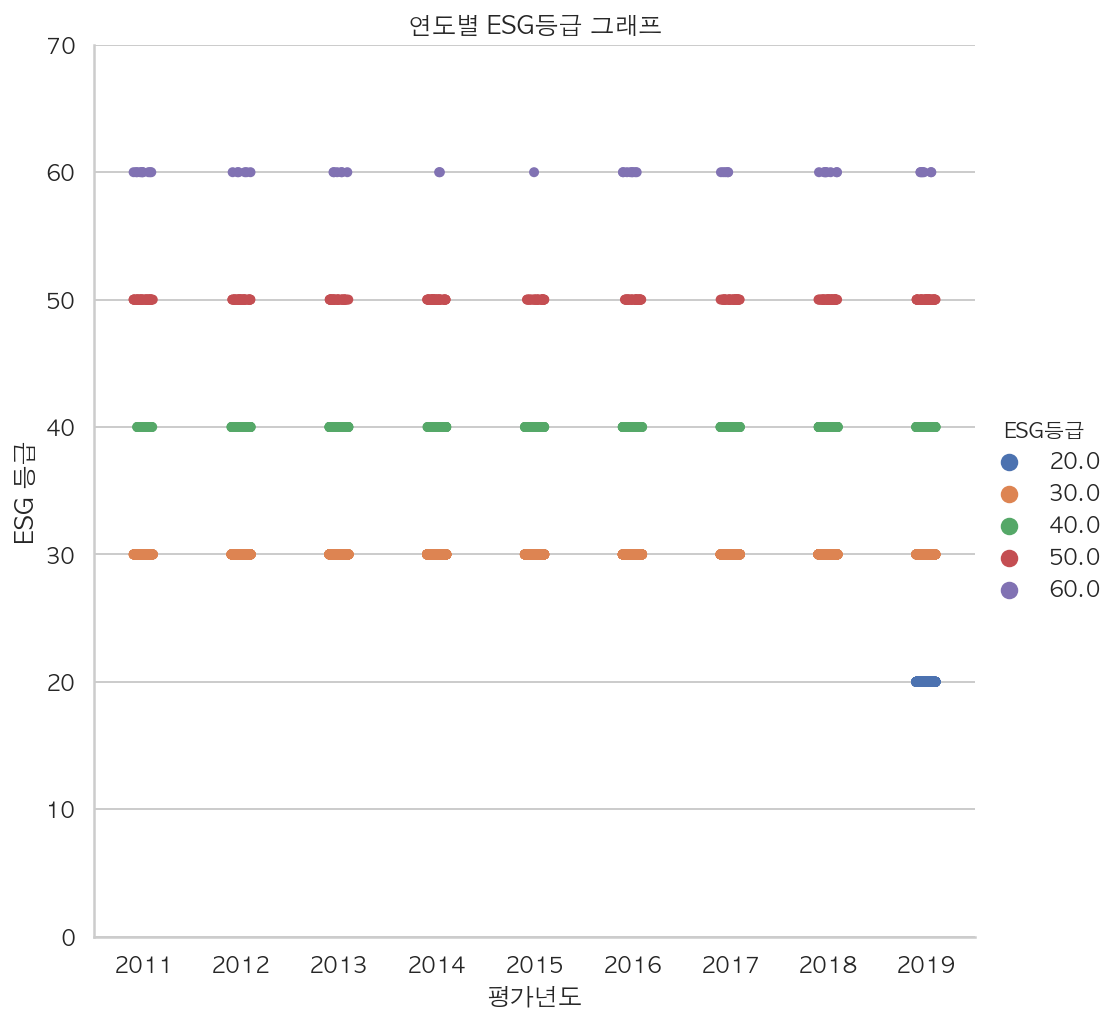

<Figure size 7200x7200 with 0 Axes>

In [10]:
sns.catplot(x="평가년도", y="ESG등급",hue="ESG등급",data=df_esg.iloc[:,2:],height=7, aspect=1)
plt.title("연도별 ESG등급 그래프")
plt.ylabel("ESG 등급")
plt.ylim(0,70)
plt.figure(figsize=(100,100))
plt.show()

## Balance Sheet

In [12]:
df_f = ["비유동부채.xlsx","자산총계.xlsx","이자보상배율.xlsx","ROA(당기순이익).xlsx","ROE(당기순이익).xlsx","총자산_총자본.xlsx",
        "유동비율.xlsx","영업활동현금흐름.xlsx","EBITDA.xlsx","CAPEX.xlsx","당기순이익.xlsx","자산총계.xlsx","매출액.xlsx","EBIT.xlsx",
       "부채비율.xlsx","차입부채_EBITDA.xlsx","EBITDA_이자비용.xlsx","총차입부채.xlsx"]

for i in range(1,19):
    setattr(mod, 'df_balance_{}'.format(i), change_columns(pd.read_excel(df_f[i-1])[9:]))

balance_list = [df_balance_3, df_balance_4, df_balance_5, df_balance_6,df_balance_7,df_balance_8,df_balance_9,df_balance_10,df_balance_11,
               df_balance_12,df_balance_13,df_balance_14,df_balance_15,df_balance_16,df_balance_17]

for i in range(15): 
    balance_list[i][ (balance_list[i].values == "N/A(IFRS)") | (balance_list[i].values== '완전잠식')] = np.nan
    for k in range(4,15): 
        balance_list[i].iloc[:,k] = balance_list[i].iloc[:,k].apply(lambda x: float(str(x)))
        

FileNotFoundError: [Errno 2] No such file or directory: 'EBITDA.xlsx'

In [ ]:
msno.matrix(df_balance_1)
plt.show()

In [ ]:
list_credit = [df_credit_2013,df_credit_2014,df_credit_2015,df_credit_2016,df_credit_2017,
             df_credit_2018,df_credit_2019]

list_esg = [df_esg_2011,df_esg_2012,df_esg_2013,df_esg_2014,df_esg_2015,df_esg_2016,
            df_esg_2017,df_esg_2018,df_esg_2019]

list_balance = [df_balance_1,df_balance_2,df_balance_3,df_balance_4,df_balance_5,
               df_balance_6,df_balance_7,df_balance_8,df_balance_9,df_balance_10,
               df_balance_11,df_balance_12,df_balance_13,df_balance_14,df_balance_15,
               df_balance_16,df_balance_17,df_balance_18]




df_columns = ["기업코드","비유동부채","자산총계","이자보상배율","ROA","ROE","총자산_총자본","유동비율","영업활동현금흐름",
             "EBITDA","CAPEX","당기순이익","자산총계","매출액","EBIT","부채비율","차입부채_EBITDA","EBITDA_이자비용","총차입부채"]


for i in range(2013,2020):
    setattr(mod, 'df_rating_{}'.format(i), merge_code(list_credit[i-2013],list_esg[i-2013]))

for k in range(2011, 2020):
    for i in range(1,19):
        setattr(mod, 'df_{}_{}'.format(k,i), (pd.DataFrame(list_balance[i-1].iloc[:,[0,2023-k]]))) 

In [ ]:
data_frames_2011 = [df_2011_1,df_2011_2,df_2011_3,df_2011_4,df_2011_5,df_2011_6,df_2011_7,df_2011_8,df_2011_9,df_2011_10,
                   df_2011_11,df_2011_12,df_2011_13,df_2011_14,df_2011_15,df_2011_16,df_2011_17,df_2011_18]
df_merged_2011 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2011).dropna()
df_merged_2011.columns = df_columns

data_frames_2012 = [df_2012_1,df_2012_2,df_2012_3,df_2012_4,df_2012_5,df_2012_6,df_2012_7,df_2012_8,df_2012_9,df_2012_10,
                   df_2012_11,df_2012_12,df_2012_13,df_2012_14,df_2012_15,df_2012_16,df_2012_17,df_2012_18]
df_merged_2012 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2012).dropna()
df_merged_2012.columns = df_columns

data_frames_2013 = [df_2013_1,df_2013_2,df_2013_3,df_2013_4,df_2013_5,df_2013_6,df_2013_7,df_2013_8,df_2013_9,df_2013_10,
                   df_2013_11,df_2013_12,df_2013_13,df_2013_14,df_2013_15,df_2013_16,df_2013_17,df_2013_18]
df_merged_2013 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2013).dropna()
df_merged_2013.columns = df_columns

data_frames_2014 = [df_2014_1,df_2014_2,df_2014_3,df_2014_4,df_2014_5,df_2014_6,df_2014_7,df_2014_8,df_2014_9,df_2014_10,
                   df_2014_11,df_2014_12,df_2014_13,df_2014_14,df_2014_15,df_2014_16,df_2014_17,df_2014_18]
df_merged_2014 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2014).dropna()
df_merged_2014.columns = df_columns

data_frames_2015 = [df_2015_1,df_2015_2,df_2015_3,df_2015_4,df_2015_5,df_2015_6,df_2015_7,df_2015_8,df_2015_9,df_2015_10,
                   df_2015_11,df_2015_12,df_2015_13,df_2015_14,df_2015_15,df_2015_16,df_2015_17,df_2015_18]
df_merged_2015 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2015).dropna()
df_merged_2015.columns = df_columns

data_frames_2016 = [df_2016_1,df_2016_2,df_2016_3,df_2016_4,df_2016_5,df_2016_6,df_2016_7,df_2016_8,df_2016_9,df_2016_10,
                   df_2016_11,df_2016_12,df_2016_13,df_2016_14,df_2016_15,df_2016_16,df_2016_17,df_2016_18]
df_merged_2016 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2016).dropna()
df_merged_2016.columns = df_columns

data_frames_2017 = [df_2017_1,df_2017_2,df_2017_3,df_2017_4,df_2017_5,df_2017_6,df_2017_7,df_2017_8,df_2017_9,df_2017_10,
                   df_2017_11,df_2017_12,df_2017_13,df_2017_14,df_2017_15,df_2017_16,df_2017_17,df_2017_18]
df_merged_2017 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2017).dropna()
df_merged_2017.columns = df_columns

data_frames_2018 = [df_2018_1,df_2018_2,df_2018_3,df_2018_4,df_2018_5,df_2018_6,df_2018_7,df_2018_8,df_2018_9,df_2018_10,
                   df_2018_11,df_2018_12,df_2018_13,df_2018_14,df_2018_15,df_2018_16,df_2018_17,df_2018_18]
df_merged_2018 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2018).dropna()
df_merged_2018.columns = df_columns

data_frames_2019 = [df_2019_1,df_2019_2,df_2019_3,df_2019_4,df_2019_5,df_2019_6,df_2019_7,df_2019_8,df_2019_9,df_2019_10,
                   df_2019_11,df_2019_12,df_2019_13,df_2019_14,df_2019_15,df_2019_16,df_2019_17,df_2019_18]
df_merged_2019 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2019).dropna()
df_merged_2019.columns = df_columns

In [ ]:
list_merge = [df_merged_2011,df_merged_2012,df_merged_2013,df_merged_2014,df_merged_2015,df_merged_2016,df_merged_2017,
             df_merged_2018,df_merged_2019]

for i in range(2011,2020):
    list_merge[i-2011]["비유동부채_자산"] = list_merge[i-2011]['비유동부채']/list_merge[i-2011]['자산총계']
    list_merge[i-2011]['총자산_총자본'] = list_merge[i-2011]['총자산_총자본'].apply(lambda x: np.reciprocal(x))
    list_merge[i-2011]["FCF"] = list_merge[i-2011]['영업활동현금흐름'] - list_merge[i-2011]["CAPEX"]
    list_merge[i-2011]["EBIT_매출액"] = list_merge[i-2011]["EBIT"]/list_merge[i-2011]["매출액"]

    setattr(mod, 'df_merged_b_{}'.format(i), name_change(pd.merge(list_merge[i-2011], \
                                                list_esg[i-2011],on=['기업코드'], how='inner')).iloc[:,[0,3,4,5,6,7,9,11,12,13,
                                                                                               15,16,17,18,19,20,21,23,26,25,24]])

In [ ]:
df_merged_b_2012.head()

## DataFrame Merge

In [ ]:
df_total_2013 = pd.merge(df_rating_2013, df_merged_b_2012, on="기업코드", how="inner")
df_total_2014 = pd.merge(df_rating_2014, df_merged_b_2013, on="기업코드", how="inner")
df_total_2015 = pd.merge(df_rating_2015, df_merged_b_2014, on="기업코드", how="inner")
df_total_2016 = pd.merge(df_rating_2016, df_merged_b_2015, on="기업코드", how="inner")
df_total_2017 = pd.merge(df_rating_2017, df_merged_b_2016, on="기업코드", how="inner")
df_total_2018 = pd.merge(df_rating_2018, df_merged_b_2017, on="기업코드", how="inner")
df_total_2019 = pd.merge(df_rating_2019, df_merged_b_2018, on="기업코드", how="inner")
df_rating_2020 = merge_code(df_credit_2020, df_esg_2019)
df_total_2020 = pd.merge(df_rating_2020, df_merged_b_2019, on="기업코드", how="inner")


In [ ]:
df_total_2013.head(2)

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_total_2013.iloc[:,4:], palette = "RdBu")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_total_2014.iloc[:,4:], palette = "RdBu")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_total_2015.iloc[:,4:], palette = "RdBu")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_total_2016.iloc[:,4:], palette = "RdBu")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_total_2017.iloc[:,3:], palette = "RdBu")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_total_2018.iloc[:,4:], palette = "RdBu")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_total_2019.iloc[:,4:], palette = "RdBu")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_total_2020.iloc[:,4:], palette = "RdBu")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_sum_2013_2020 = pd.concat([df_total_2013, df_total_2014,df_total_2015,df_total_2016,df_total_2017,\
                              df_total_2018,df_total_2019,df_total_2020]).replace(np.inf,np.nan).dropna().reset_index(drop=True)

df_sum_2015_2020 = pd.concat([df_total_2015,df_total_2016,df_total_2017,\
                              df_total_2018,df_total_2019,df_total_2020]).replace(np.inf,np.nan).dropna().reset_index(drop=True)

plt.figure(figsize=(10,5))
sns.boxplot(data=df_sum_2013_2020.iloc[:,4:], palette = "RdBu")
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
for i in range(4,20):
    plt.plot(df_sum_2013_2020.iloc[:,i])

plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df_sum_2013_2020.iloc[:,4:].corr(), annot=True,vmin=-1,
fmt = '.2f', linewidths=.5, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

In [ ]:
# plt.figure(figsize=(5,5))
# sns.pairplot(df_sum_2013_2020.iloc[:,4:-4])
# plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df_sum_2013_2020["평가등급"])
plt.xticks(rotation=45)
plt.show()

In [ ]:
credit_dlist={"D":10,"C-":10,"C":10,"C+":10,"CC-":20,"CC":20,"CC+":20,"CCC-":20,"CCC":20,"CCC+":20,
              "B-":30,"B":30,"B+":30,"BB-":30,"BB":30,"BB+":30,"BBB-":30,"BBB":30,"BBB+":40,
              "A-":40,"A":40,"A+":40,"AA-":40,"AA":40,"AA+":50,"AAA-":50,"AAA":50,"AAA+":50}

#credit_dlist={"CCC":10, "B-":10,"B+":10,"BB-":20,"BB":20,"BB+":20,"BBB-":30,"BBB":30,"BBB+":30,"A-":30,"A":40,"A+":40,"AA-":40,"AA":40,"AA+":50,"AAA":50}



df_sum_2015_2020['평가등급'] = df_sum_2015_2020['평가등급'].apply(credit_dlist.get)
df_sum_2013_2020['평가등급'] = df_sum_2013_2020['평가등급'].apply(credit_dlist.get)

In [ ]:
# cmap = plt.get_cmap("tab20c")
# color = cmap(np.array(np.arange(20)))

In [ ]:
# label =  list(pd.DataFrame(df_sum_2013_2020.groupby("평가등급").size()).reset_index()["평가등급"])
# explode = (0, 0.1, 0, 0)

# plt.figure(figsize=(10,10))
# plt.pie(df_sum_2013_2020.groupby("평가등급").size(), colors=color, labels = label,autopct='%0.2f')

# plt.show()

In [ ]:
X2 = df_sum_2013_2020.iloc[:,4:]
Y2 = df_sum_2013_2020.iloc[:,2]
X = df_sum_2015_2020.iloc[:,4:]
Y = df_sum_2015_2020.iloc[:,2]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

In [ ]:
robust_scaler = StandardScaler()
rb = robust_scaler.fit(X2)
output2 = robust_scaler.transform(X2)
output2 = pd.DataFrame(output2, columns=X2.columns, index=list(X2.index.values))
output2["Y"] = Y2
output2.describe()

In [ ]:
robust_scaler = RobustScaler()
rb = robust_scaler.fit(X)
output = robust_scaler.transform(X)
output = pd.DataFrame(output, columns=X.columns, index=list(X.index.values))
output["Y"] = Y

## OLS Regression

In [ ]:
model = sm.OLS.from_formula("Y ~ ROA+ROE+INTCOV+EQTA+CURR+EBITDA+NI+TASSET+Sale+DR+BTEBITDA+EBITDATIE+TB+FCF+LTDTA+EBITTS+E+S+G",data=output2)
result = model.fit()
print(result.summary())

In [ ]:
model = sm.OLS.from_formula("Y ~ ROA+ROE+INTCOV+EQTA+CURR+EBITDA+NI+TASSET+Sale+DR+BTEBITDA+EBITDATIE+TB+LTDTA+FCF+EBITTS+E+S+G",data=output)
result = model.fit()
print(result.summary())

In [ ]:
model = sm.OLS.from_formula("Y ~ ROA+ROE+CURR+EBITDA+NI+Sale+DR+BTEBITDA+EBITDATIE+TB+FCF+EBITTS",data=output2)
result = model.fit()
print(result.summary())

## Conclusion


- 신용평가를 받은 기업이 많지 않아 샘플수가 부족


- 신용평가와 ESG 등급을 산정하는 수식이 없다는 점에 정확한 신용평가 등급을 수치화를 하기 불가능


- ESG 등급은 KLGS에서 선정하는 등급을 사용하나 전세계적으로 통합된 어떤 기준이 없어 절대적이라고 보기 어려움

In [ ]:
df_tain = output2.iloc[:416,:-1].dropna()
df_test = output2.iloc[417:,:-1].dropna()
# y_train = output2.iloc[:416,:-1].dropna()
# y_test = output2.iloc[417:,:-1].dropna()

In [ ]:
# from sklearn import datasets, linear_model
# from sklearn.metrics import mean_squared_error, r2_score

# regr = linear_model.LinearRegression(output2)
# regr.fit(X_train, y_train)

In [ ]:
y_pred = regr.predict(np.array(X_test))

In [ ]:
y_pred

In [ ]:
formula=("Y ~ ROA+ROE+INTCOV+EQTA+CURR+EBITDA+NI+TASSET+Sale+DR+BTEBITDA+EBITDATIE+TB+LTDTA+FCF+EBITTS+E+S+G")

df_train.shape, df_test.shape
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(output2)):
    df_train = output2.iloc[idx_train]
    df_test = output2.iloc[idx_test]

    model = sm.OLS.from_formula(formula, data=output2)
    result = model.fit()

    pred = result.predict(df_test)
    rss = ((df_test.Y - pred)  **2).sum()
    tss = ((df_test.Y - df_test.Y.mean()) **2).sum()
    rsquared = 1 - rss / tss

    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

In [ ]:
#esg 없음
formula=("Y ~ ROA+ROE+INTCOV+EQTA+CURR+EBITDA+NI+TASSET+Sale+DR+BTEBITDA+EBITDATIE+TB+LTDTA+FCF+EBITTS")

df_train.shape, df_test.shape
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(output2)):
    df_train = output2.iloc[idx_train]
    df_test = output2.iloc[idx_test]

    model = sm.OLS.from_formula(formula, data=output2)
    result = model.fit()

    pred = result.predict(df_test)
    rss = ((df_test.Y - pred)  **2).sum()
    tss = ((df_test.Y - df_test.Y.mean()) **2).sum()
    rsquared = 1 - rss / tss

    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

In [ ]:
df_test

In [ ]:
df_train

In [ ]:
X_train.tail()